In [241]:
import pandas as pd

In [242]:
df = pd.read_csv('df_violations.csv')

In [243]:
len(df)

268458

In [244]:
i = 'Evidence of mice or live mice'
j = 'Evidence of rats or live rats'

In [245]:
df['VIOLATION DESCRIPTION'] = df['VIOLATION DESCRIPTION'].fillna('None')

In [246]:
df_rodents_i = df[df['VIOLATION DESCRIPTION'].str.contains(i, regex=True)]

In [247]:
df_rodents_j = df[df['VIOLATION DESCRIPTION'].str.contains(j, regex=True)]

In [248]:
df_rodents = pd.concat([df_rodents_i, df_rodents_j])

In [249]:
df_rodents.head(2)

,Unnamed: 0,CAMIS,VIOLATION CODE,VIOLATION DESCRIPTION,ACTION,CRITICAL FLAG,inspection_date
0,0,30075445,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).,Critical,2019-05-16
10,10,30112340,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).,Critical,2018-03-13


In [250]:
dummy = pd.get_dummies(df_rodents['VIOLATION CODE'], drop_first = False)

In [251]:
dummy.head(2)

,04K,04L
0,0,1
10,0,1


In [252]:
dummy.rename(columns={"04L":"live_mice", "04K":"live_rats"}, inplace=True)

In [253]:
dummy.live_rats.sum() + dummy.live_mice.sum()

22708

In [254]:
dummy = dummy.reset_index(inplace=False)

In [255]:
dummy.head(2)

,index,live_rats,live_mice
0,0,0,1
1,10,0,1


In [256]:
df = df.reset_index(inplace=False)

In [257]:
dummy['rodents'] = dummy['live_rats'] + dummy['live_mice']

In [258]:
dummy.drop(['live_rats', 'live_mice'], axis = 1, inplace=True)

In [259]:
df_rodent_violations = pd.merge(dummy, df, on='index')

In [261]:
len(df_rodent_violations)

22708

In [262]:
df_rodent_violations.head(2)

,index,rodents,Unnamed: 0,CAMIS,VIOLATION CODE,VIOLATION DESCRIPTION,ACTION,CRITICAL FLAG,inspection_date
0,0,1,0,30075445,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).,Critical,2019-05-16
1,10,1,10,30112340,04L,Evidence of mice or live mice present in facil...,Violations were cited in the following area(s).,Critical,2018-03-13


In [263]:
df_rodent_violations.drop(['VIOLATION DESCRIPTION', 'VIOLATION CODE', 'ACTION', 'CRITICAL FLAG', 'Unnamed: 0'], axis = 1, inplace = True)

In [264]:
len(df_rodent_violations)

22708

In [265]:
zips = pd.read_csv('health inspection.csv')

In [266]:
len(zips)

268458

In [267]:
zips = zips[['CAMIS', 'ZIPCODE']]

In [268]:
zips.drop_duplicates(keep='first', inplace=True)

In [269]:
len(zips)

25780

In [284]:
df_rodent_violations.head(2)

,index,rodents,CAMIS,inspection_date
0,0,1,30075445,2019-05-16
1,10,1,30112340,2018-03-13


In [285]:
len(df_rodent_violations)

22708

In [286]:
df_rodent_violations_zips = pd.merge(df_rodent_violations, zips, on=['CAMIS'], how='left')

In [287]:
len(df_rodent_violations_zips)

22708

In [288]:
df_rodent_violations_zips.head(2)

,index,rodents,CAMIS,inspection_date,ZIPCODE
0,0,1,30075445,2019-05-16,10462.0
1,10,1,30112340,2018-03-13,11225.0


In [290]:
df_rodent_violations_zips_counts = df_rodent_violations_zips.groupby(['ZIPCODE']).count().sort_values(['rodents'], ascending=False)

In [298]:
df_rodent_violations_zips_counts.drop(['rodents', 'CAMIS', 'inspection_date'], axis=1, inplace = True)

In [300]:
df_rodent_violations_zips_counts.rename(columns={"index":"violation_count"}, inplace=True)

In [301]:
df_rodent_violations_zips_counts.to_csv('df_rodent_violations_zips_counts.csv')

In [302]:
unique_inspections = pd.read_csv('unique_inspection.csv')

In [304]:
no_of_inspections = unique_inspections.groupby(['ZIPCODE']).count().sort_values(['PHONE'], ascending=False)

In [305]:
no_of_inspections.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,PHONE,CUISINE DESCRIPTION,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,inspection_date,ADDRESS,Weather,DAY OF WEEK,weather_binary
ZIPCODE,,,,,,,,,,,,,,,
10003.0,2203,2203,2203,2203,2203,2203,2203,1374,1374,2203,2203,2203,2203,2203,2203
10019.0,2143,2143,2143,2143,2143,2143,2143,1451,1451,2143,2143,2143,2143,2143,2143


In [306]:
no_of_inspections.reset_index(inplace = True)

In [307]:
no_of_inspections = no_of_inspections[['ZIPCODE', 'Unnamed: 0']]

In [316]:
df_rodent_violations_zips_counts.reset_index(inplace=True)

In [317]:
df_rodent_violations_zips_counts.head(2)

,ZIPCODE,violation_count
0,10003.0,777
1,10002.0,470


In [312]:
df_rodent_violations_zips_counts.head(2)

,violation_count
ZIPCODE,
10003.0,777
10002.0,470


In [318]:
no_of_inspections.rename(columns={"Unnamed: 0":"inspections"}, inplace=True)

In [320]:
no_of_inspections.drop(['index'], axis=1, inplace = True)

In [323]:
violations_per_zip = pd.merge(no_of_inspections, df_rodent_violations_zips_counts, on='ZIPCODE')

In [324]:
violations_per_zip.to_csv('violations_per_zip.csv')

In [325]:
violations_per_zip

,ZIPCODE,inspections,violation_count
0,10003.0,2203,777
1,10019.0,2143,355
2,10036.0,1819,376
3,10013.0,1692,422
4,10002.0,1667,470
5,10001.0,1551,273
6,11354.0,1488,295
7,10022.0,1447,339
8,10011.0,1431,410
9,10016.0,1426,436


In [328]:
complaints_by_zipcode = pd.read_csv('df_rat_complaints_by_zipcode.csv')

In [330]:
complaints_by_zipcode.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [331]:
complaints_by_zipcode

,incident_zip,complaints
0,11221.0,1318
1,11238.0,1279
2,10025.0,1268
3,11216.0,1211
4,11233.0,1005
5,11207.0,983
6,11226.0,975
7,10467.0,932
8,11215.0,910
9,10456.0,822


In [333]:
complaints_by_zipcode.rename(columns={"incident_zip":"ZIPCODE"}, inplace=True)

In [335]:
complaints_by_zipcode.head(2)

,ZIPCODE,complaints
0,11221.0,1318
1,11238.0,1279


In [361]:
df_rodents = pd.merge(violations_per_zip, complaints_by_zipcode, on='ZIPCODE')

In [362]:
df_rodents['vio_per_insp'] = df_rodents.violation_count / df_rodents.inspections

In [363]:
df_rodents.head(2)

,ZIPCODE,inspections,violation_count,complaints,vio_per_insp
0,10003.0,2203,777,366,0.352701
1,10019.0,2143,355,192,0.165656


In [364]:
df_rodents_ols = df_rodents

In [346]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

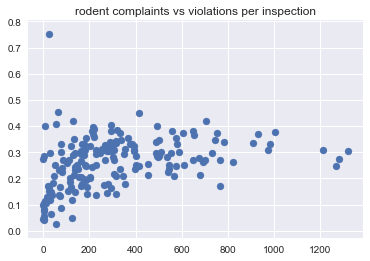

In [357]:
plt.scatter(df_rodents.complaints, df_rodents.vio_per_insp)
plt.title("rodent complaints vs violations per inspection")
plt.show()

In [378]:
formula = "vio_per_insp ~ complaints"
model = ols(formula= formula, data=df_rodents_ols).fit()

In [379]:
outcome = 'vio_per_insp'
predictors = df_rodents_ols.drop('vio_per_insp', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [380]:
model = ols(formula= formula, data=df_rodents_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vio_per_insp   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     32.91
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           1.37e-20
Time:                        15:23:32   Log-Likelihood:                 218.24
No. Observations:                 185   AIC:                            -426.5
Df Residuals:                     180   BIC:                            -410.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0551      0.109     -0.508      0.612      -0.269       0.159
ZIPCODE          2.627e-05   9.91e-06      2.652      0.009    6.73e-06    4.58e-05
inspections        -0.0003   3.89e-05     -8.213      0.000      -0.000      -0.000
violation_count     0.0013      0.000      9.102      0.000       0.001       0.002
complaints       5.336e-05   2.23e-05      2.395      0.018     9.4e-06    9.73e-05
==============================================================================
Omnibus:                       92.861   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1004.954
Skew:                           1.567   Prob(JB):                    5.98e-219
Kurtosis:                      13.980   Cond. No.                     2.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
from sklearn.linear_model import LinearRegression

In [382]:
y = df_rodents_ols['vio_per_insp']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [383]:
linreg.coef_

array([ 2.62743549e-05, -3.19456473e-04,  1.32474444e-03,  5.33582250e-05])

In [384]:
linreg.intercept_

-0.055142978934179965

In [385]:
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=df_rodents_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vio_per_insp   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     32.91
Date:                Fri, 07 Jun 2019   Prob (F-statistic):           1.37e-20
Time:                        15:23:44   Log-Likelihood:                 218.24
No. Observations:                 185   AIC:                            -426.5
Df Residuals:                     180   BIC:                            -410.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0551      0.109     -0.508      0.612      -0.269       0.159
ZIPCODE          2.627e-05   9.91e-06      2.652      0.009    6.73e-06    4.58e-05
inspections        -0.0003   3.89e-05     -8.213      0.000      -0.000      -0.000
violation_count     0.0013      0.000      9.102      0.000       0.001       0.002
complaints       5.336e-05   2.23e-05      2.395      0.018     9.4e-06    9.73e-05
==============================================================================
Omnibus:                       92.861   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1004.954
Skew:                           1.567   Prob(JB):                    5.98e-219
Kurtosis:                      13.980   Cond. No.                     2.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""